In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data = yf.download('AMD MSFT', start='2020-10-01', end='2025-11-01', interval='1mo')
close = data['Close']
returns = np.log(close / close.shift(1))
print(returns.head(6))

C:\Users\willb\AppData\Local\Temp\ipykernel_10236\1760194351.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AMD MSFT', start='2020-10-01', end='2025-11-01', interval='1mo')
[*********************100%***********************]  2 of 2 completed

Ticker           AMD      MSFT
Date                          
2020-10-01       NaN       NaN
2020-11-01  0.207590  0.055711
2020-12-01 -0.010306  0.040879
2021-01-01 -0.068479  0.041997
2021-02-01 -0.013283  0.001809
2021-03-01 -0.073771  0.016783


In [5]:
r = returns.dropna()
r1 = r['AMD'].mean()
r2 = r['MSFT'].mean()
s1 = r['AMD'].std()
s2 = r['MSFT'].std()
rho = r.corr().loc['AMD', 'MSFT']

In [10]:
weights = np.linspace(-1, 2, 200)
port_ret = weights * r1 + (1 - weights) * r2
port_var = weights**2 * s1**2 + (1 - weights)**2 * s2**2 + 2 * weights * (1 - weights) * s1 * s2 * rho
port_std = np.sqrt(port_var)
print(weights[:5], port_ret[:5], port_var[:5], port_std[:5])

[-1.         -0.98492462 -0.96984925 -0.95477387 -0.93969849] [0.01309989 0.01315228 0.01320466 0.01325704 0.01330942] [0.01486471 0.01447074 0.01408377 0.0137038  0.01333084] [0.12192092 0.1202944  0.11867507 0.11706325 0.11545924]


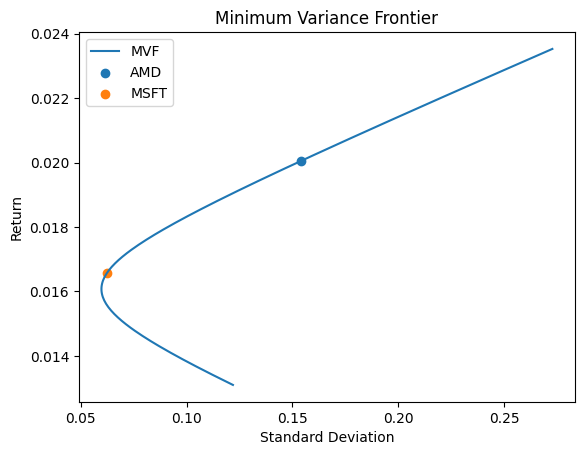

In [11]:
plt.plot(port_std, port_ret, label='MVF')
plt.scatter(s1, r1, label='AMD')
plt.scatter(s2, r2, label='MSFT')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Minimum Variance Frontier')
plt.legend()
plt.show()